# Import libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv('data/house_pricing.csv')
df.shape

(1460, 35)

In [3]:
df.head()

,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
0,1,RL,8450,Pave,AllPub,Gtl,2Story,2003,2003,Gable,...,2003.0,RFn,2,548,Y,61,0,0,NaN,208500
1,2,RL,9600,Pave,AllPub,Gtl,1Story,1976,1976,Gable,...,1976.0,RFn,2,460,Y,0,0,0,NaN,181500
2,3,RL,11250,Pave,AllPub,Gtl,2Story,2001,2002,Gable,...,2001.0,RFn,2,608,Y,42,0,0,NaN,223500
3,4,RL,9550,Pave,AllPub,Gtl,2Story,1915,1970,Gable,...,1998.0,Unf,3,642,Y,35,272,0,NaN,140000
4,5,RL,14260,Pave,AllPub,Gtl,2Story,2000,2000,Gable,...,2000.0,RFn,3,836,Y,84,0,0,NaN,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   RoofStyle      1460 non-null   object 
 10  Foundation     1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Electrical     1459 non-null   object 
 15  1stFlrSF       1460 non-null   int64  
 16  2ndFlrSF       1460 non-null   int64  
 17  GrLivArea      1460 non-null   int64  
 18  BsmtFull

# Clean data

- Use all features?
- Null values? Drop, mean, median, mode, ...
- Duplicated values? (see "duplicated" and "drop_duplicates" functions in pandas)
- Outliers.

## NaNs

### Inspection

In [5]:
# NaN values
nan_ser = df.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

MiscFeature     1406
GarageFinish      81
GarageYrBlt       81
GarageType        81
Electrical         1
dtype: int64

In [6]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Create a new category "Nothing" instead of NaN values:

In [7]:
df['MiscFeature'].fillna('Nothing', inplace=True)

There is only one missing value in `Electrical`. The whole row seems quite normal:

In [8]:
df[df['Electrical'].isna()]

,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
1379,1380,RL,9735,Pave,AllPub,Gtl,SLvl,2006,2007,Gable,...,2007.0,Fin,2,400,Y,0,0,0,Nothing,167500


In [9]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

As the vast majority of the values in `Electrical` are `SBrkr` and the house is quite new, let's impute it with this value:

In [10]:
df.loc[df['Electrical'].isna(), 'Electrical'] = 'SBrkr'

The remaining 3 columns with NaNs are all related to the garage, all corresponding to the same 81 rows:

In [11]:
df[df.isna().any(axis=1)]

,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
39,40,RL,6040,Pave,AllPub,Gtl,1Story,1955,1955,Gable,...,NaN,NaN,0,0,N,0,0,0,Nothing,82000
48,49,RM,4456,Pave,AllPub,Gtl,2Story,1920,2008,Gable,...,NaN,NaN,0,0,N,0,102,0,Nothing,113000
78,79,RL,10778,Pave,AllPub,Gtl,1Story,1968,1968,Hip,...,NaN,NaN,0,0,Y,0,0,0,Nothing,136500
88,89,C (all),8470,Pave,AllPub,Gtl,1.5Fin,1915,1982,Hip,...,NaN,NaN,0,0,N,0,156,0,Nothing,85000
89,90,RL,8070,Pave,AllPub,Gtl,1Story,1994,1995,Gable,...,NaN,NaN,0,0,Y,0,0,0,Nothing,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,RM,5250,Pave,AllPub,Gtl,2Story,1872,1987,Gable,...,NaN,NaN,0,0,Y,54,20,0,Nothing,122000
1407,1408,RL,8780,Pave,AllPub,Gtl,1Story,1985,1985,Gable,...,NaN,NaN,0,0,Y,0,0,0,Nothing,112000
1449,1450,RM,1533,Pave,AllPub,Gtl,SFoyer,1970,1970,Gable,...,NaN,NaN,0,0,Y,0,0,0,Nothing,92000
1450,1451,RL,9000,Pave,AllPub,Gtl,2Story,1974,1974,Gable,...,NaN,NaN,0,0,Y,45,0,0,Nothing,136000


In the data description it says that when these values are NaN it means there is no garage. We can create a new category for categorical variables:

In [12]:
df.loc[df['GarageType'].isna(), ['GarageType', 'GarageFinish']] = 'NoGarage'

In [13]:
df['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [14]:
df['GarageFinish'].value_counts()

Unf         605
RFn         422
Fin         352
NoGarage     81
Name: GarageFinish, dtype: int64

For the numerical variable `GarageYrBlt`, if we impute NaNs with any value (e.g., 0, -1, or building year of the house), we are going to skew the visualization. We cannot create a string category because the column is numberic. Keep it NaN for now and during feature engineering we will take care of it.

Make sure there are no remaining NaNs a part from `GarageYrBlt`:

In [15]:
df.loc[:, df.columns != 'GarageYrBlt'].isna().any().any()

False

## Dupicates

No duplicated rows:

In [16]:
df.duplicated().any()

False

No duplicated IDs:

In [17]:
df['Id'].duplicated().any()

False

Some rows seem suspicious of being duplicated but, as we are not sure, we leave them, maybe their are from the same neighborhood.

In [18]:
df[df[['MSZoning', 'LotArea', '1stFlrSF', 'GarageArea', 'YearBuilt']].duplicated(keep=False)].sort_values(['LotArea', 'YearBuilt'])

,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
235,236,RM,1680,Pave,AllPub,Gtl,2Story,1971,1971,Gable,...,1971.0,Unf,1,264,Y,0,0,0,Nothing,89500
430,431,RM,1680,Pave,AllPub,Gtl,2Story,1971,1971,Gable,...,1971.0,Unf,1,264,Y,0,0,0,Nothing,85400
180,181,FV,2117,Pave,AllPub,Gtl,2Story,2000,2000,Gable,...,2000.0,Unf,2,440,Y,0,0,0,Nothing,177000
1358,1359,FV,2117,Pave,AllPub,Gtl,2Story,2000,2000,Gable,...,2000.0,Unf,2,440,Y,32,0,0,Nothing,177500
145,146,RM,2522,Pave,AllPub,Gtl,2Story,2004,2006,Gable,...,2004.0,Unf,2,380,Y,40,0,0,Nothing,130000
193,194,RM,2522,Pave,AllPub,Gtl,2Story,2004,2004,Gable,...,2004.0,Unf,2,380,Y,40,0,0,Nothing,130000
1088,1089,RM,2522,Pave,AllPub,Gtl,2Story,2004,2004,Gable,...,2004.0,Unf,2,380,Y,40,0,0,Nothing,137500
831,832,FV,3180,Pave,AllPub,Gtl,2Story,2005,2005,Gable,...,2005.0,RFn,2,480,Y,166,0,0,Nothing,151000
1364,1365,FV,3180,Pave,AllPub,Gtl,2Story,2005,2005,Gable,...,2005.0,RFn,2,480,Y,166,0,0,Nothing,144152
472,473,RM,3675,Pave,AllPub,Gtl,SLvl,2005,2005,Gable,...,2005.0,RFn,2,525,Y,28,0,0,Nothing,148000


## Outliers

There does not seem to be any outlier that is an error per se.

Maybe there are some high sale prices that could skew our models, but we can deal with this while training.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.00,0.0,1.00,3.0
FullBath,1460.0,1.565068,0.550916,0.0,1.00,2.0,2.00,3.0


In [20]:
df['SalePrice'].sort_values(ascending=False).head(10)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

## Save CSV

In [21]:
df.to_csv('data/house_pricing_clean.csv', index=False)

# Exploratory Data Analysis (EDA)

- Outliers?
- Correlations?
- Consistency: do all values of the features and target make sense?
- Explore the data

## Numerical features distribution

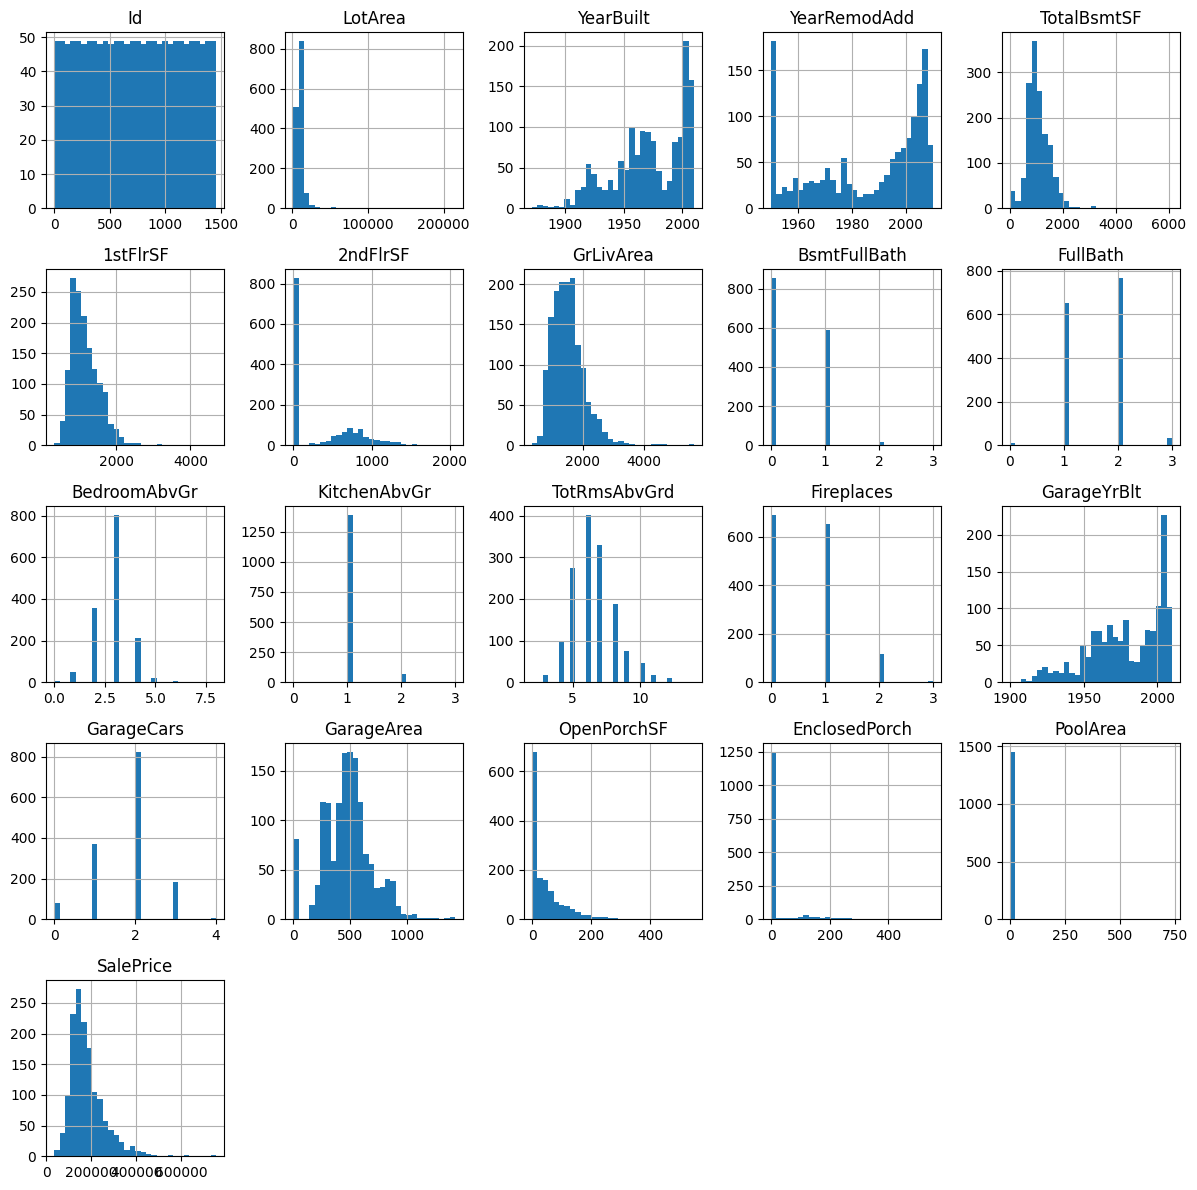

In [22]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

Most of the values seem correct.

There is something weird with `YearRemodAdd`, as a lot of values are accumulated at the minimum:

In [23]:
df[df['YearRemodAdd'] == df['YearRemodAdd'].min()]

,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
8,9,RM,6120,Pave,AllPub,Gtl,1.5Fin,1931,1950,Gable,...,1931.0,Unf,2,468,Y,0,205,0,Nothing,129900
9,10,RL,7420,Pave,AllPub,Gtl,1.5Unf,1939,1950,Gable,...,1939.0,RFn,1,205,Y,4,0,0,Nothing,118000
21,22,RM,7449,Pave,AllPub,Gtl,1.5Unf,1930,1950,Gable,...,1930.0,Unf,1,280,N,0,205,0,Nothing,139400
29,30,RM,6324,Pave,AllPub,Gtl,1Story,1927,1950,Gable,...,1920.0,Unf,1,240,Y,0,87,0,Nothing,68500
30,31,C (all),8500,Pave,AllPub,Gtl,2Story,1920,1950,Gambrel,...,1920.0,Unf,1,250,N,54,172,0,Nothing,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1409,RM,7740,Pave,AllPub,Gtl,2Story,1910,1950,Gable,...,1966.0,Unf,2,528,Y,0,0,0,Nothing,125500
1412,1413,RL,7200,Pave,AllPub,Gtl,1Story,1949,1950,Gable,...,1956.0,Unf,2,420,Y,0,0,0,Nothing,90000
1416,1417,RM,11340,Pave,AllPub,Gtl,2Story,1885,1950,Gable,...,1971.0,Unf,2,560,N,0,114,0,Nothing,122500
1427,1428,RL,10930,Pave,AllPub,Gtl,1.5Fin,1945,1950,Gable,...,1962.0,Unf,1,288,Y,0,0,0,Nothing,140000


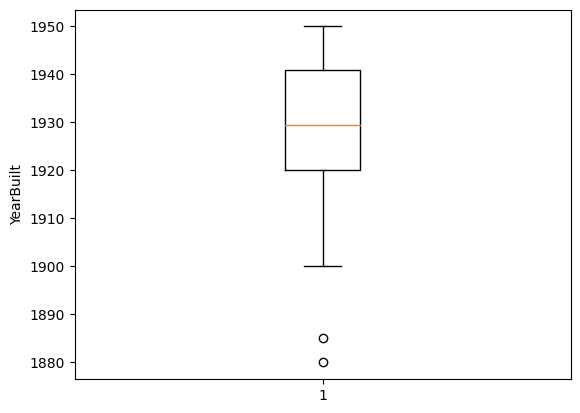

In [24]:
# Year built for houses that were remodeled in 1950
plt.boxplot(df[df['YearRemodAdd'] == df['YearRemodAdd'].min()]['YearBuilt'])
plt.ylabel('YearBuilt')
plt.show()

It seems a lot of old houses were renovated in 1950, or the people that collected the data set values to 1950 for old houses when they did not know the last renovation date. Anyway, I do not think the latter will skew our models by much, so we can leave this.

## Categorical features distribution

In [25]:
# Categorical features
df.columns[df.dtypes == 'object']

Index(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'HouseStyle',
       'RoofStyle', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature'],
      dtype='object')

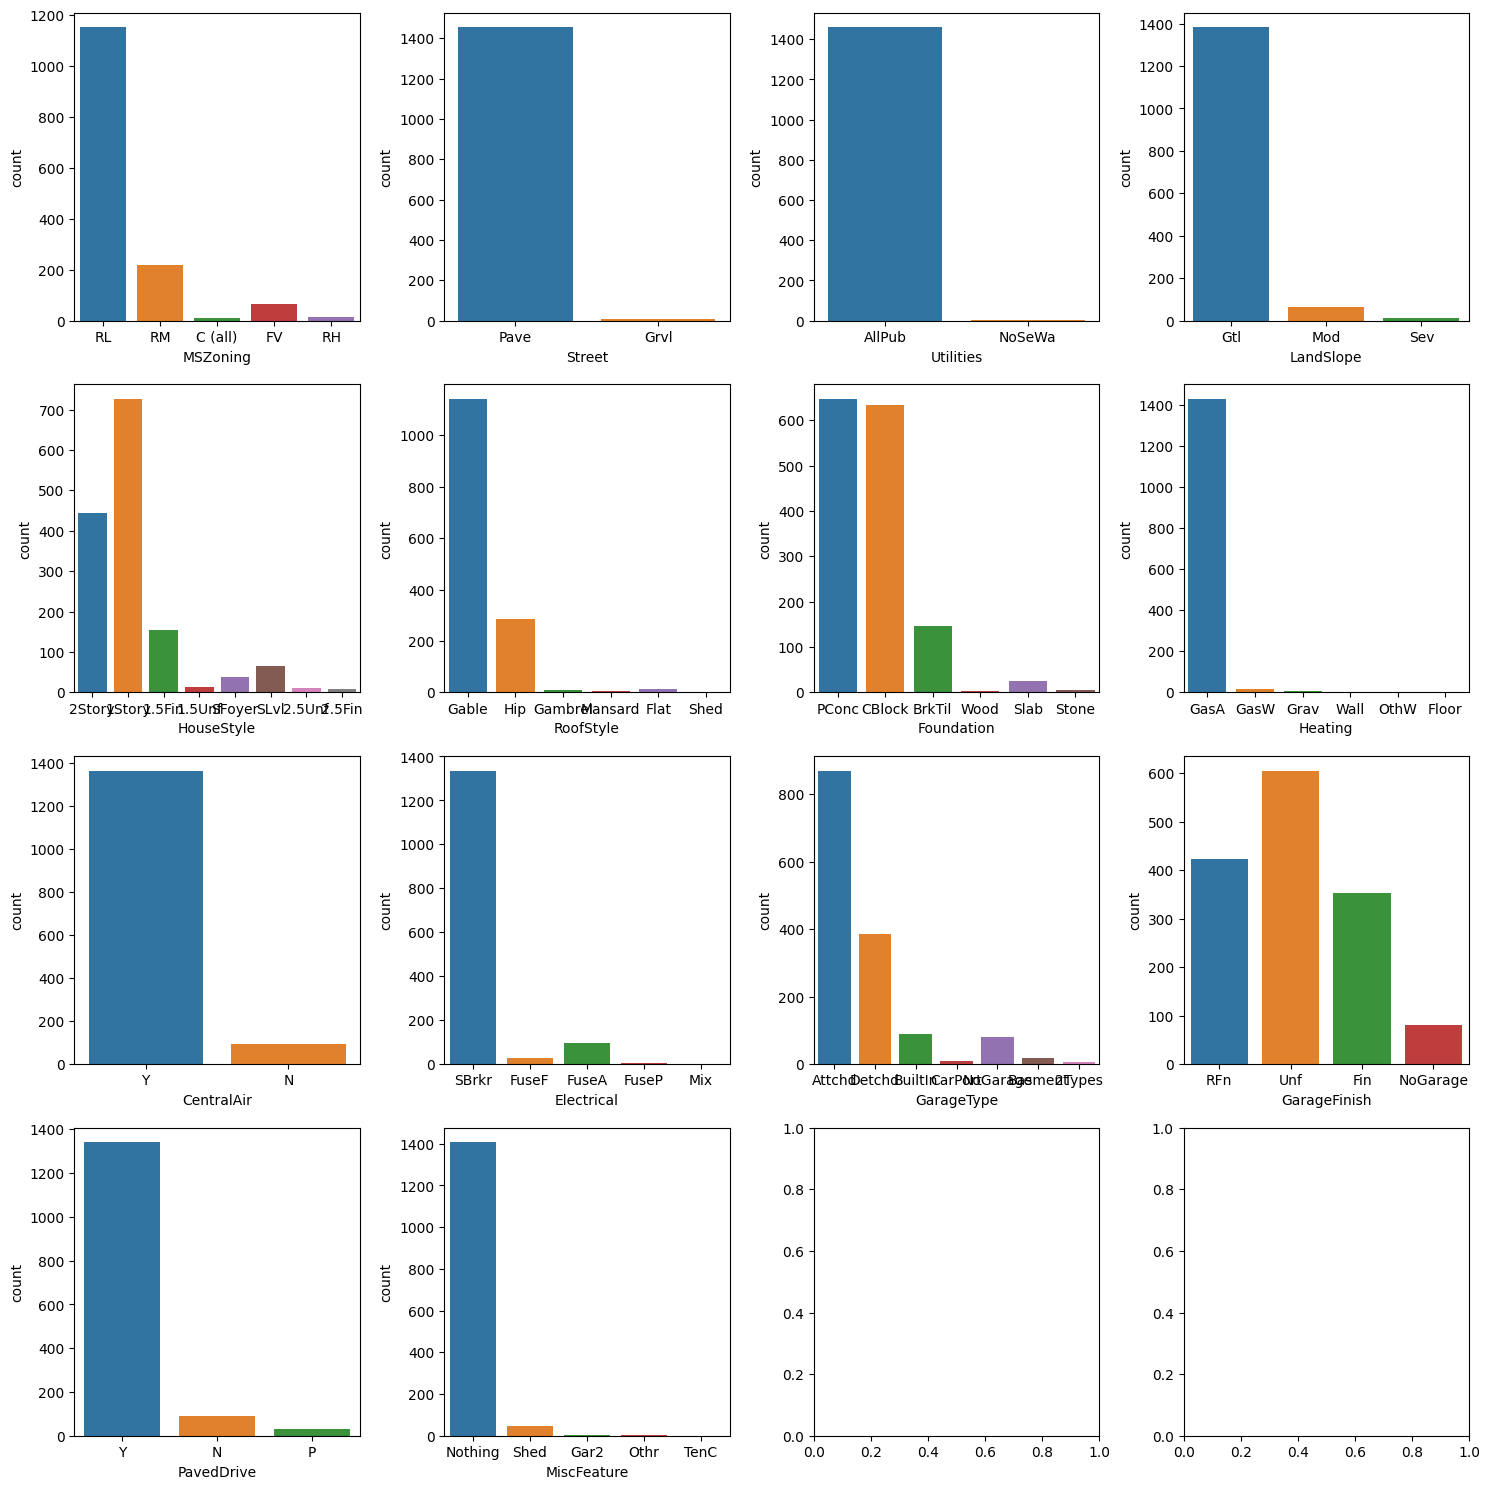

In [26]:
# 4 subplots in one row
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
obj_fts = df.columns[df.dtypes == 'object']

for i, col in enumerate(obj_fts):
    x, y = divmod(i, 4)
    sns.countplot(x=df[col], ax=axes[x, y])

plt.tight_layout()
plt.show()

## Correlation matrix

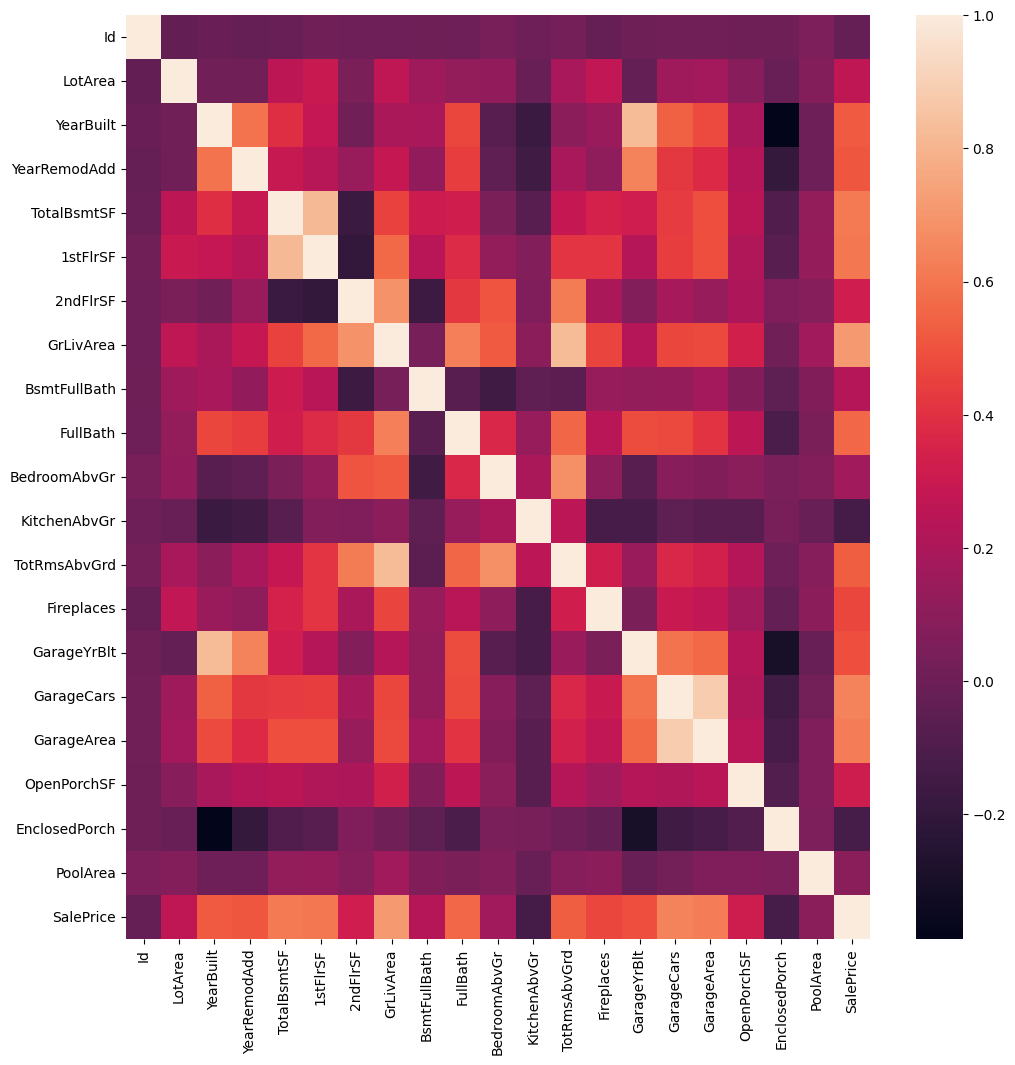

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

## Pair plot

In [28]:
# Numerical features
df.select_dtypes(include='number').columns

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea',
       'SalePrice'],
      dtype='object')

In [29]:
# Pairplot continuous features only
fts_to_pair = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF', 'PoolArea']

### Scatter

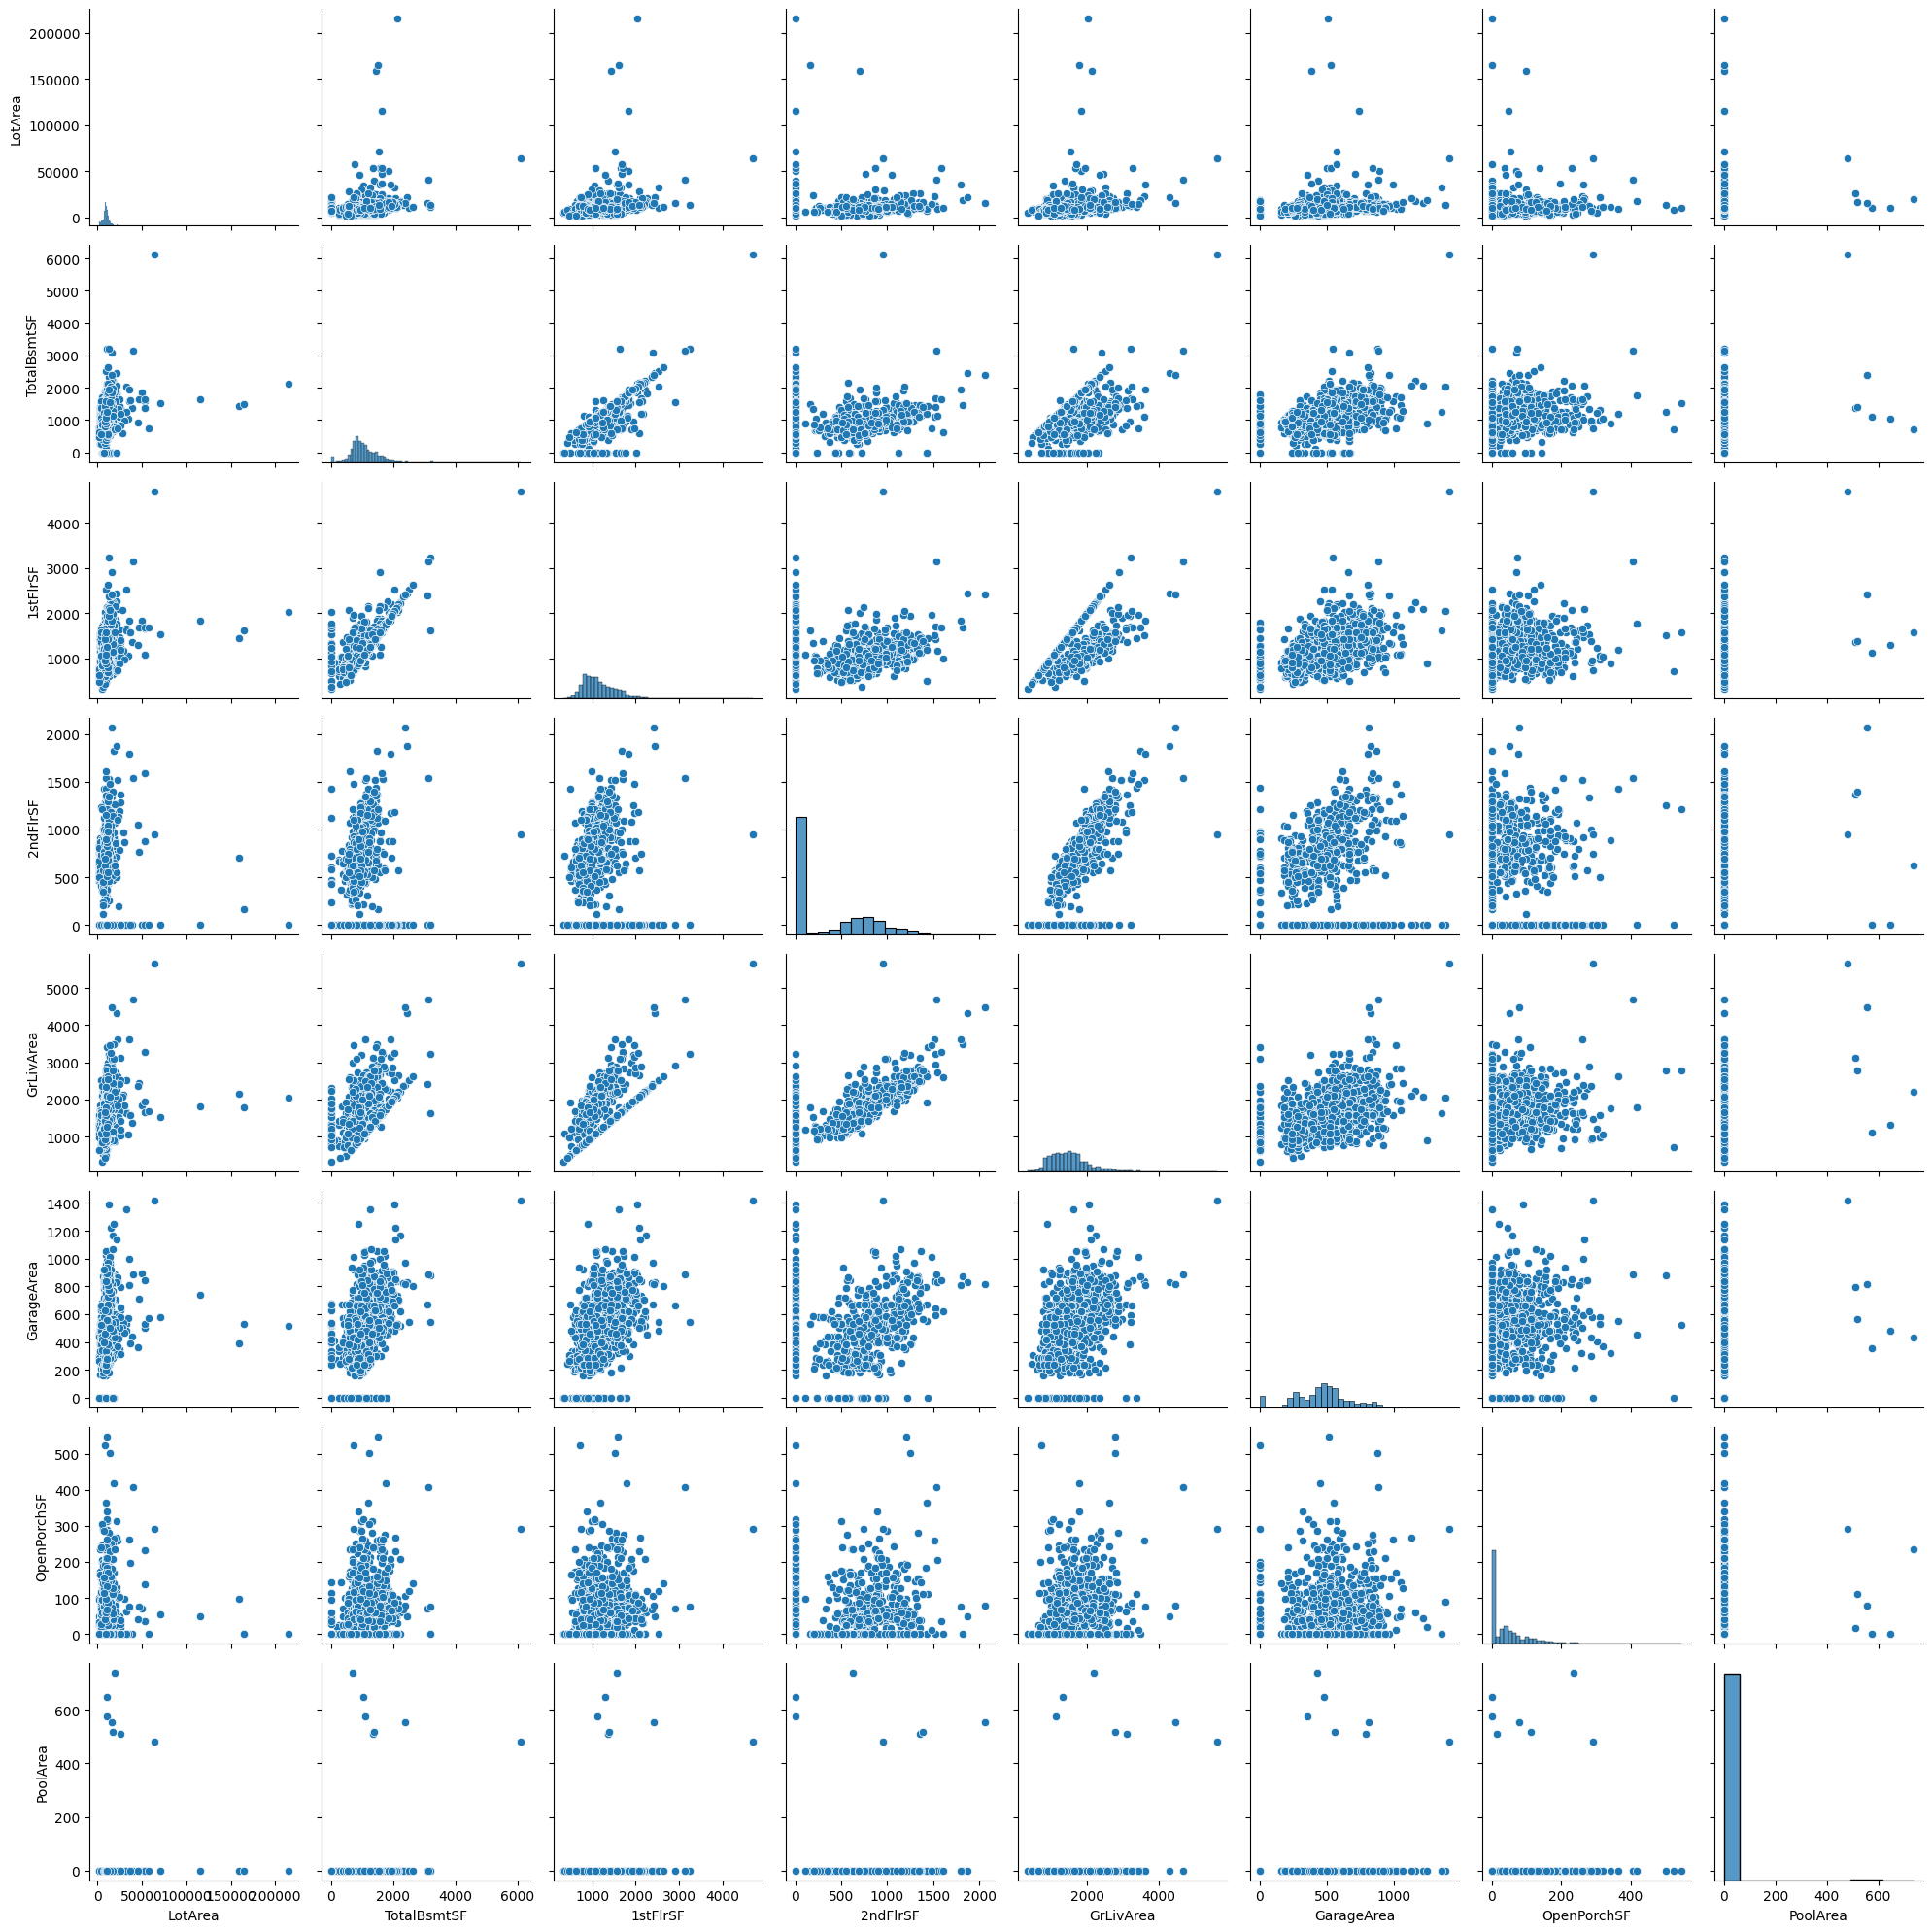

In [30]:
sns.pairplot(df[fts_to_pair])
plt.tight_layout()
plt.show()

### KDE

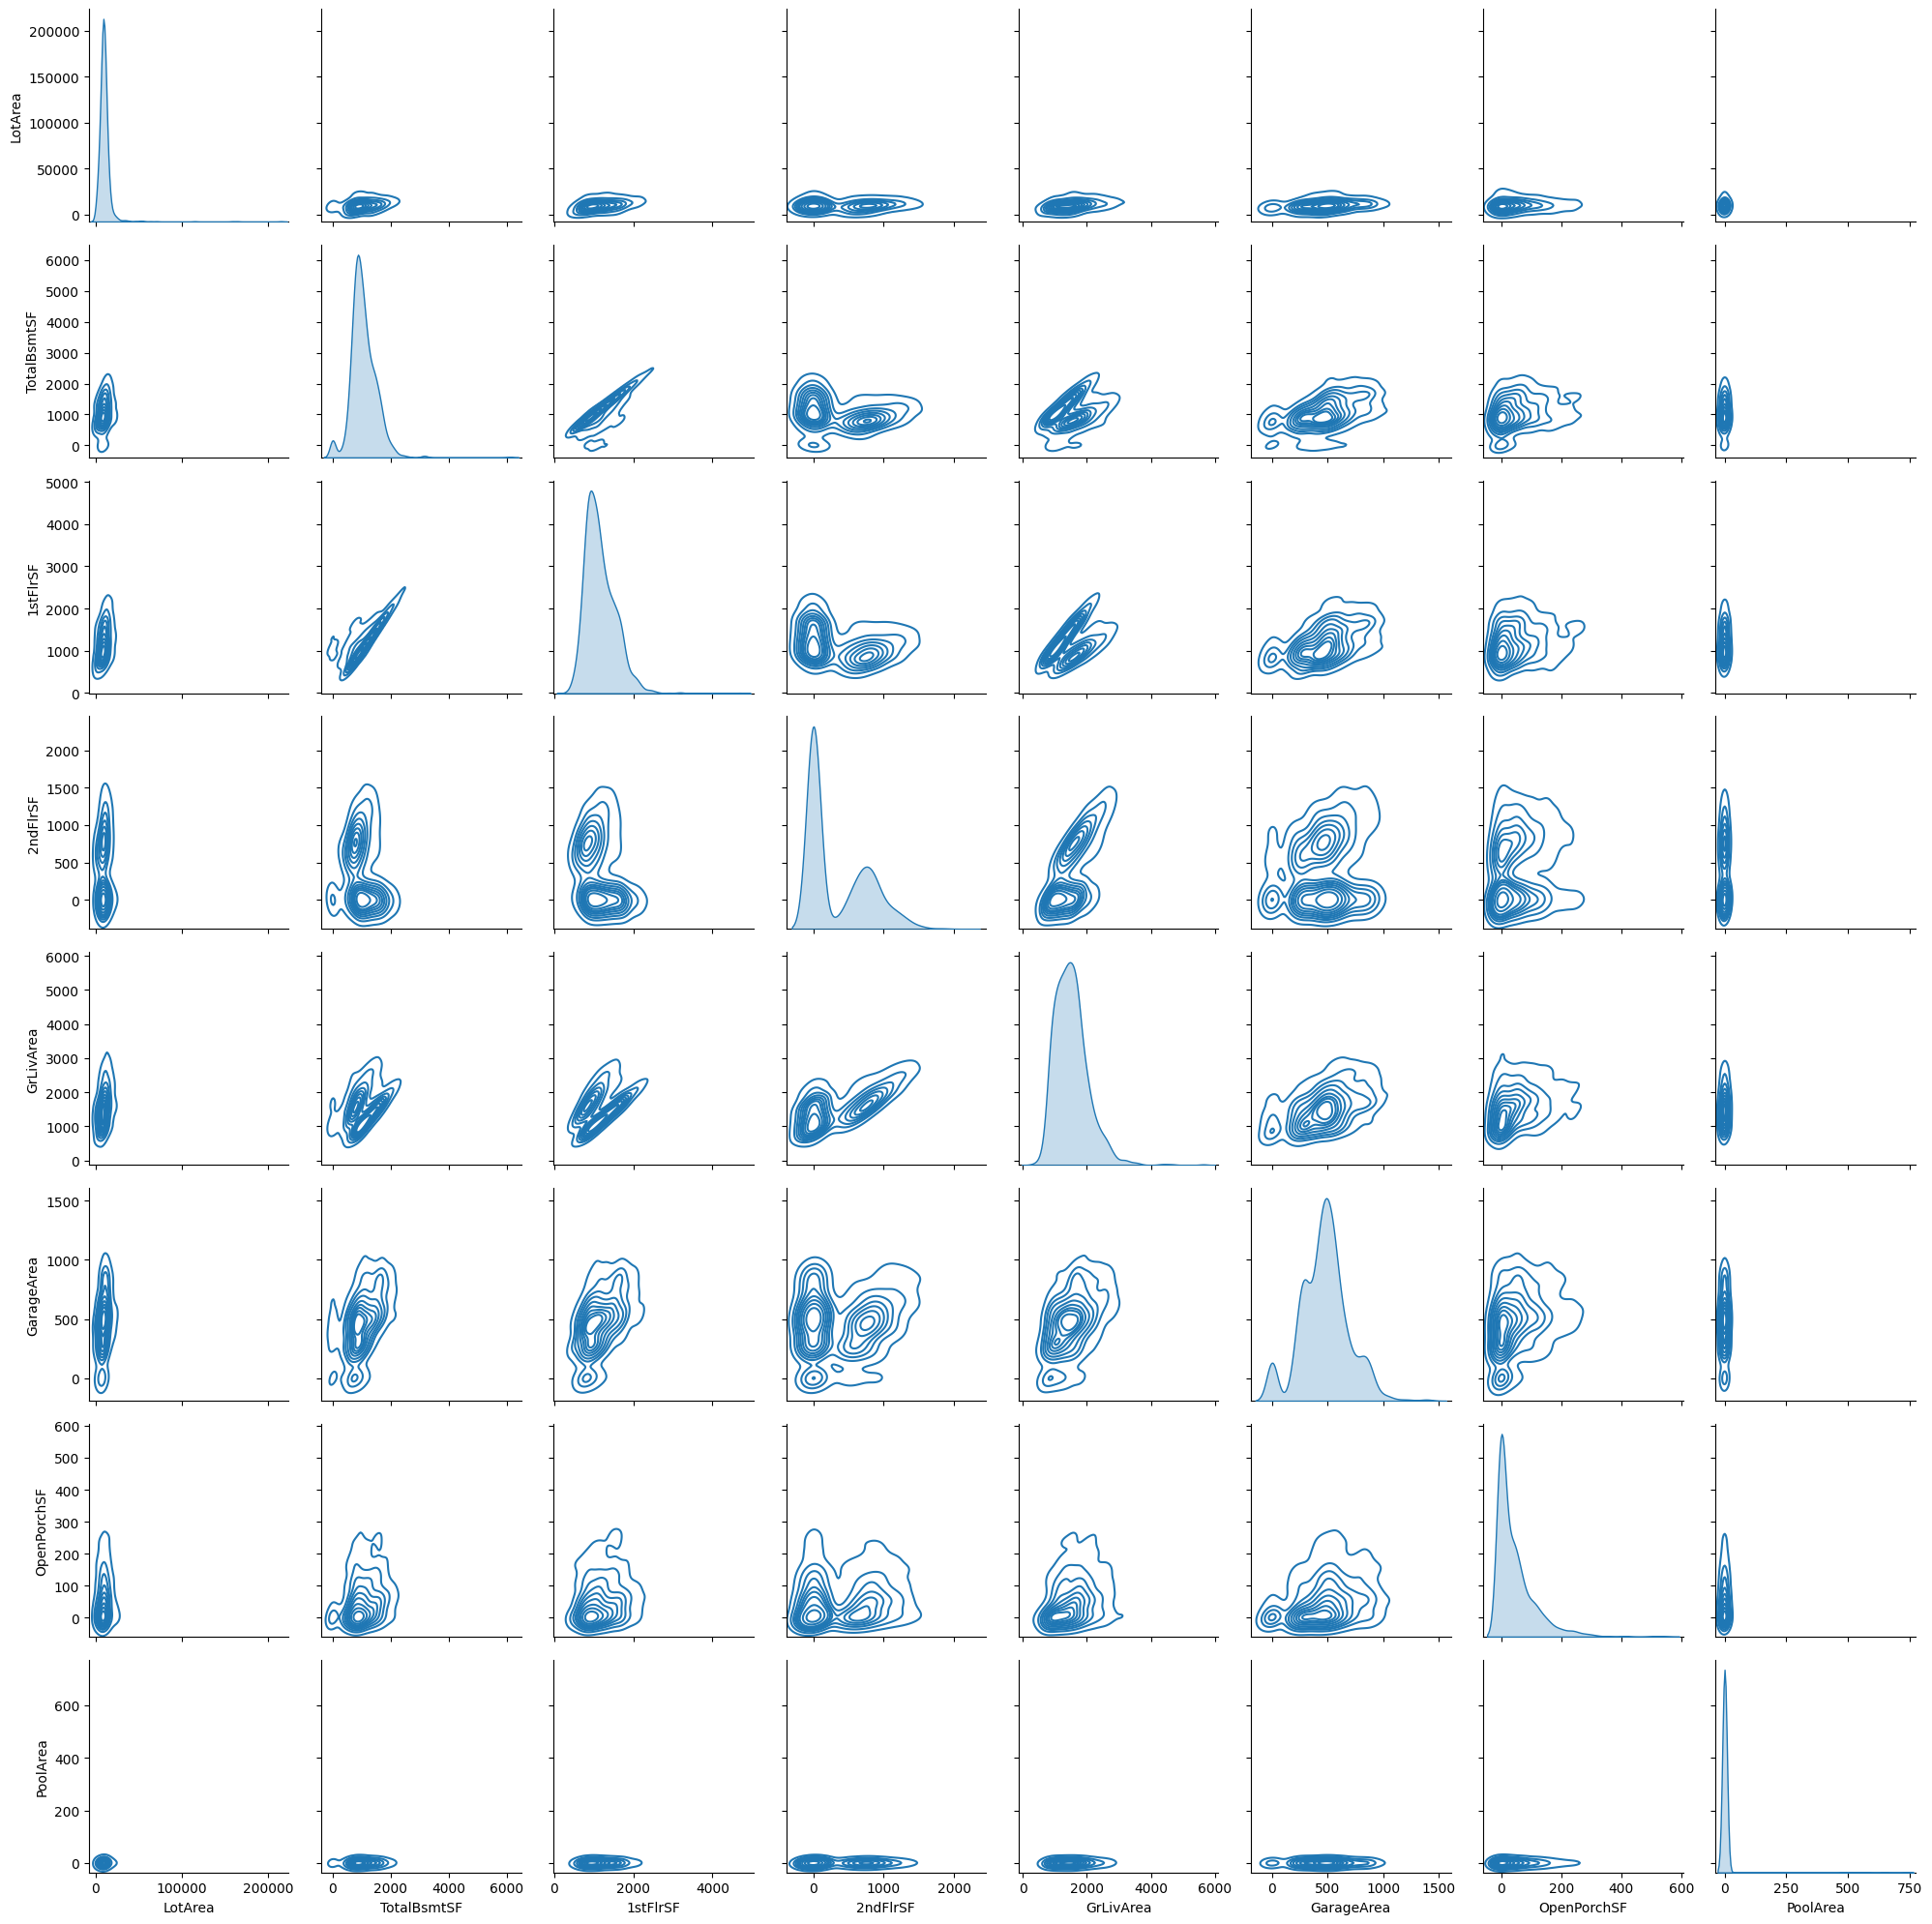

In [31]:
sns.pairplot(df[fts_to_pair], kind='kde')
plt.tight_layout()
plt.show()

## Correlation with Price

In [35]:
# feature correlations with sale price
price_corrs = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:].to_frame()

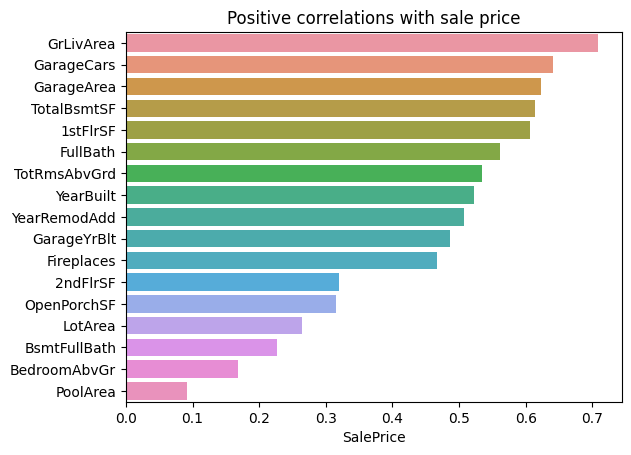

In [36]:
# positive correlations
pos_corrs = price_corrs[price_corrs['SalePrice'] >= 0]
sns.barplot(x='SalePrice', y=pos_corrs.index, data=pos_corrs)
plt.title('Positive correlations with sale price')
plt.show()

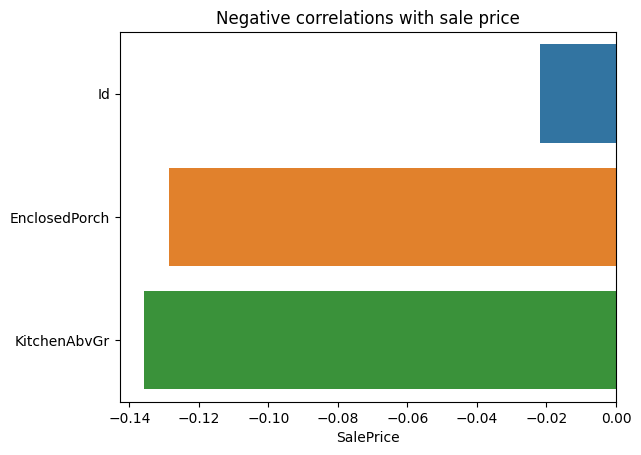

In [37]:
# negative correlations
neg_corrs = price_corrs[price_corrs['SalePrice'] < 0]
sns.barplot(x='SalePrice', y=neg_corrs.index, data=neg_corrs)
plt.title('Negative correlations with sale price')
plt.show()

# Feature engineering

In [77]:
df = pd.read_csv('data/house_pricing_clean.csv')

- Remove unnecessary features
- Encode categorical features: Label Encoding, One-Hot Encoding, ...
- Correlations?
- New features?

## Remove unnecessary features

In [78]:
df.drop(['Id'], axis=1, inplace=True)

Create new binary column for `Shed`.

In [79]:
df['HasShed'] = 0
df.loc[df['MiscFeature'] == 'Shed', 'HasShed'] = 1

Drop `MiscFeature`, as most of the values are null:

In [80]:
df.drop('MiscFeature', axis=1, inplace=True)

## Missing Imputations

In [81]:
df['GarageYrBlt'].fillna(0, inplace=True)

## Categorical features

In the EDA we saw some categories are very unbalanced:

In [82]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [83]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

`Utilities` is not useful for price prediction, as we can only train or test with the only `NoSeWa`, but not both. Let's remove it:

In [84]:
df.drop('Utilities', axis=1, inplace=True)

In [85]:
df.columns[df.dtypes == 'object']

Index(['MSZoning', 'Street', 'LandSlope', 'HouseStyle', 'RoofStyle',
       'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
       'GarageFinish', 'PavedDrive'],
      dtype='object')

Which one-hot encoding and which label encoding?

We can label encode:
- Binary features: `Street`, `CentralAir`, `PavedDrive`.
- Others: `LandSlope`.

And one-hot encode the rest.

### One-hot encoding

In [86]:
fts_to_onehot = [
    'MSZoning',
    'HouseStyle',
    'RoofStyle',
    'Foundation',
    'Heating',
    'Electrical',
    'GarageType',
]

In [87]:
# Number of unique elements, to make sure we don't create too many columns
for ft in fts_to_onehot:
    print(ft, df[ft].nunique())

MSZoning 5
HouseStyle 8
RoofStyle 6
Foundation 6
Heating 6
Electrical 5
GarageType 7


In [88]:
df = pd.get_dummies(df, columns=fts_to_onehot)
df.head()

,LotArea,Street,LandSlope,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,8450,Pave,Gtl,2003,2003,856,Y,856,854,1710,...,0,0,1,0,1,0,0,0,0,0
1,9600,Pave,Gtl,1976,1976,1262,Y,1262,0,1262,...,0,0,1,0,1,0,0,0,0,0
2,11250,Pave,Gtl,2001,2002,920,Y,920,866,1786,...,0,0,1,0,1,0,0,0,0,0
3,9550,Pave,Gtl,1915,1970,756,Y,961,756,1717,...,0,0,1,0,0,0,0,0,1,0
4,14260,Pave,Gtl,2000,2000,1145,Y,1145,1053,2198,...,0,0,1,0,1,0,0,0,0,0


### Ordinal Encoding

In [89]:
from sklearn.preprocessing import OrdinalEncoder

In [90]:
categories = {
    'Street': ['Grvl', 'Pave'],
    'CentralAir': ['N', 'Y'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'PavedDrive': ['N', 'P', 'Y'],
    'GarageFinish' : ['NoGarage', 'Unf', 'RFn', 'Fin'],
}

In [91]:
enc = OrdinalEncoder(categories=list(categories.values()))
df[list(categories.keys())] = enc.fit_transform(df[list(categories.keys())])

## Correlations

Having `GarageArea` probably makes `GarageCars` kind of obsolete, and we corroborate that they have a strong correlation. However, as they are a bit different and american people really value cars and garages, we can keep them, as they may provide valuable information.

But we have created new columns, there could be new correlations!

In [92]:
# Get correlations between features without duplicates
corrs = df.corr().unstack().reset_index().drop_duplicates()
# Remove correlations between the same feature
corrs = corrs[corrs['level_0'] != corrs['level_1']]
# Get high correlations
corrs[corrs[0] > 0.95]

,level_0,level_1,0


## New features

# Save DF

In [93]:
# Make sure all columns are numeric
assert df.select_dtypes(include='number').shape[1] == df.shape[1]

In [94]:
df.shape

(1460, 69)

In [95]:
df.to_csv('data/house_pricing_features.csv', index=False)